# Moneyball Exercise
## Find replacement players for the Oakland Athletics meeting their salary budget

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
batting <- read.csv('Batting.csv')

In [3]:
head(batting)

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,⋯,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,aardsda01,2004,1,SFN,NL,11,11,0,0,0,⋯,0,0,0,0,0,0,0,0,0,11
2,aardsda01,2006,1,CHN,NL,45,43,2,0,0,⋯,0,0,0,0,0,0,1,0,0,45
3,aardsda01,2007,1,CHA,AL,25,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
4,aardsda01,2008,1,BOS,AL,47,5,1,0,0,⋯,0,0,0,1,0,0,0,0,0,5
5,aardsda01,2009,1,SEA,AL,73,3,0,0,0,⋯,0,0,0,0,0,0,0,0,0,NA
6,aardsda01,2010,1,SEA,AL,53,4,0,0,0,⋯,0,0,0,0,0,0,0,0,0,NA


In [4]:
str(batting)

'data.frame':	97889 obs. of  24 variables:
 $ playerID : chr  "aardsda01" "aardsda01" "aardsda01" "aardsda01" ...
 $ yearID   : int  2004 2006 2007 2008 2009 2010 2012 1954 1955 1956 ...
 $ stint    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teamID   : chr  "SFN" "CHN" "CHA" "BOS" ...
 $ lgID     : chr  "NL" "NL" "AL" "AL" ...
 $ G        : int  11 45 25 47 73 53 1 122 153 153 ...
 $ G_batting: int  11 43 2 5 3 4 NA 122 153 153 ...
 $ AB       : int  0 2 0 1 0 0 NA 468 602 609 ...
 $ R        : int  0 0 0 0 0 0 NA 58 105 106 ...
 $ H        : int  0 0 0 0 0 0 NA 131 189 200 ...
 $ X2B      : int  0 0 0 0 0 0 NA 27 37 34 ...
 $ X3B      : int  0 0 0 0 0 0 NA 6 9 14 ...
 $ HR       : int  0 0 0 0 0 0 NA 13 27 26 ...
 $ RBI      : int  0 0 0 0 0 0 NA 69 106 92 ...
 $ SB       : int  0 0 0 0 0 0 NA 2 3 2 ...
 $ CS       : int  0 0 0 0 0 0 NA 2 1 4 ...
 $ BB       : int  0 0 0 0 0 0 NA 28 49 37 ...
 $ SO       : int  0 0 0 1 0 0 NA 39 61 54 ...
 $ IBB      : int  0 0 0 0 0 0 NA NA 5 6 ...
 $ HBP    

In [5]:
head(batting$AB)

[1] 0 2 0 1 0 0

In [6]:
head(batting$X2B)

[1] 0 0 0 0 0 0

In [7]:
batting$BA <- batting$H / batting$AB

In [8]:
tail(batting$BA,5)

[1] 0.1230769 0.2746479 0.1470588 0.2745098 0.2138728

## Feature Engineering

#### On Base Percentage = (Hits + Walks + Hits By Pitch) / (At Bats + Walks + Hits By Pitch + Sac Flies)

In [9]:
OBP.num <- batting$H + batting$BB + batting$HBP
OBP.den <- batting$AB + batting$BB + batting$HBP + batting$SF
batting$OBP <- OBP.num/OBP.den

#### Singles (X1B) = H - 2B - 3B - HR

In [10]:
batting$X1B <- batting$H - batting$X2B - batting$X3B - batting$HR

#### Slugging = (1B + 2(2B) + 3(3B) + 4(HR)) / At Bats

In [11]:
batting$SLG <- (batting$X1B + 2*batting$X2B + 3*batting$X3B + 4*batting$HR) / batting$AB

In [12]:
str(batting)

'data.frame':	97889 obs. of  28 variables:
 $ playerID : chr  "aardsda01" "aardsda01" "aardsda01" "aardsda01" ...
 $ yearID   : int  2004 2006 2007 2008 2009 2010 2012 1954 1955 1956 ...
 $ stint    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ teamID   : chr  "SFN" "CHN" "CHA" "BOS" ...
 $ lgID     : chr  "NL" "NL" "AL" "AL" ...
 $ G        : int  11 45 25 47 73 53 1 122 153 153 ...
 $ G_batting: int  11 43 2 5 3 4 NA 122 153 153 ...
 $ AB       : int  0 2 0 1 0 0 NA 468 602 609 ...
 $ R        : int  0 0 0 0 0 0 NA 58 105 106 ...
 $ H        : int  0 0 0 0 0 0 NA 131 189 200 ...
 $ X2B      : int  0 0 0 0 0 0 NA 27 37 34 ...
 $ X3B      : int  0 0 0 0 0 0 NA 6 9 14 ...
 $ HR       : int  0 0 0 0 0 0 NA 13 27 26 ...
 $ RBI      : int  0 0 0 0 0 0 NA 69 106 92 ...
 $ SB       : int  0 0 0 0 0 0 NA 2 3 2 ...
 $ CS       : int  0 0 0 0 0 0 NA 2 1 4 ...
 $ BB       : int  0 0 0 0 0 0 NA 28 49 37 ...
 $ SO       : int  0 0 0 1 0 0 NA 39 61 54 ...
 $ IBB      : int  0 0 0 0 0 0 NA NA 5 6 ...
 $ HBP    

In [13]:
sal <- read.csv('Salaries.csv')

In [14]:
summary(sal)

     yearID        teamID              lgID             playerID        
 Min.   :1985   Length:23956       Length:23956       Length:23956      
 1st Qu.:1993   Class :character   Class :character   Class :character  
 Median :1999   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1999                                                           
 3rd Qu.:2006                                                           
 Max.   :2013                                                           
     salary        
 Min.   :       0  
 1st Qu.:  250000  
 Median :  507950  
 Mean   : 1864357  
 3rd Qu.: 2100000  
 Max.   :33000000  

In [15]:
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }
fig(10,10)

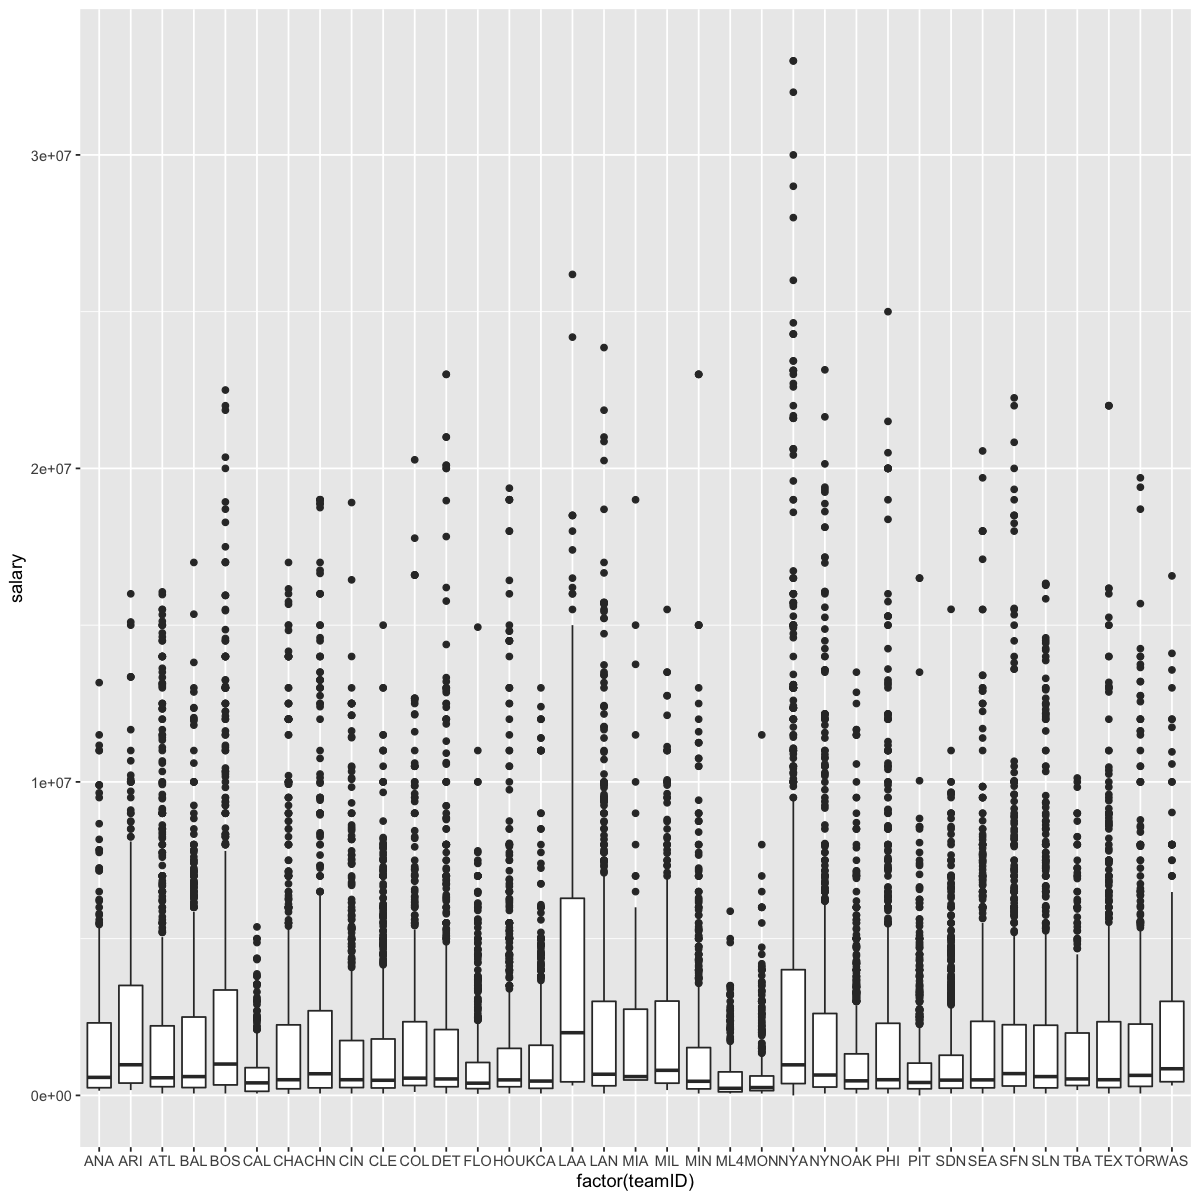

In [16]:
salBoxPlot <- ggplot(sal, aes(x=factor(teamID),y=salary)) +
            geom_boxplot()
print(salBoxPlot)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



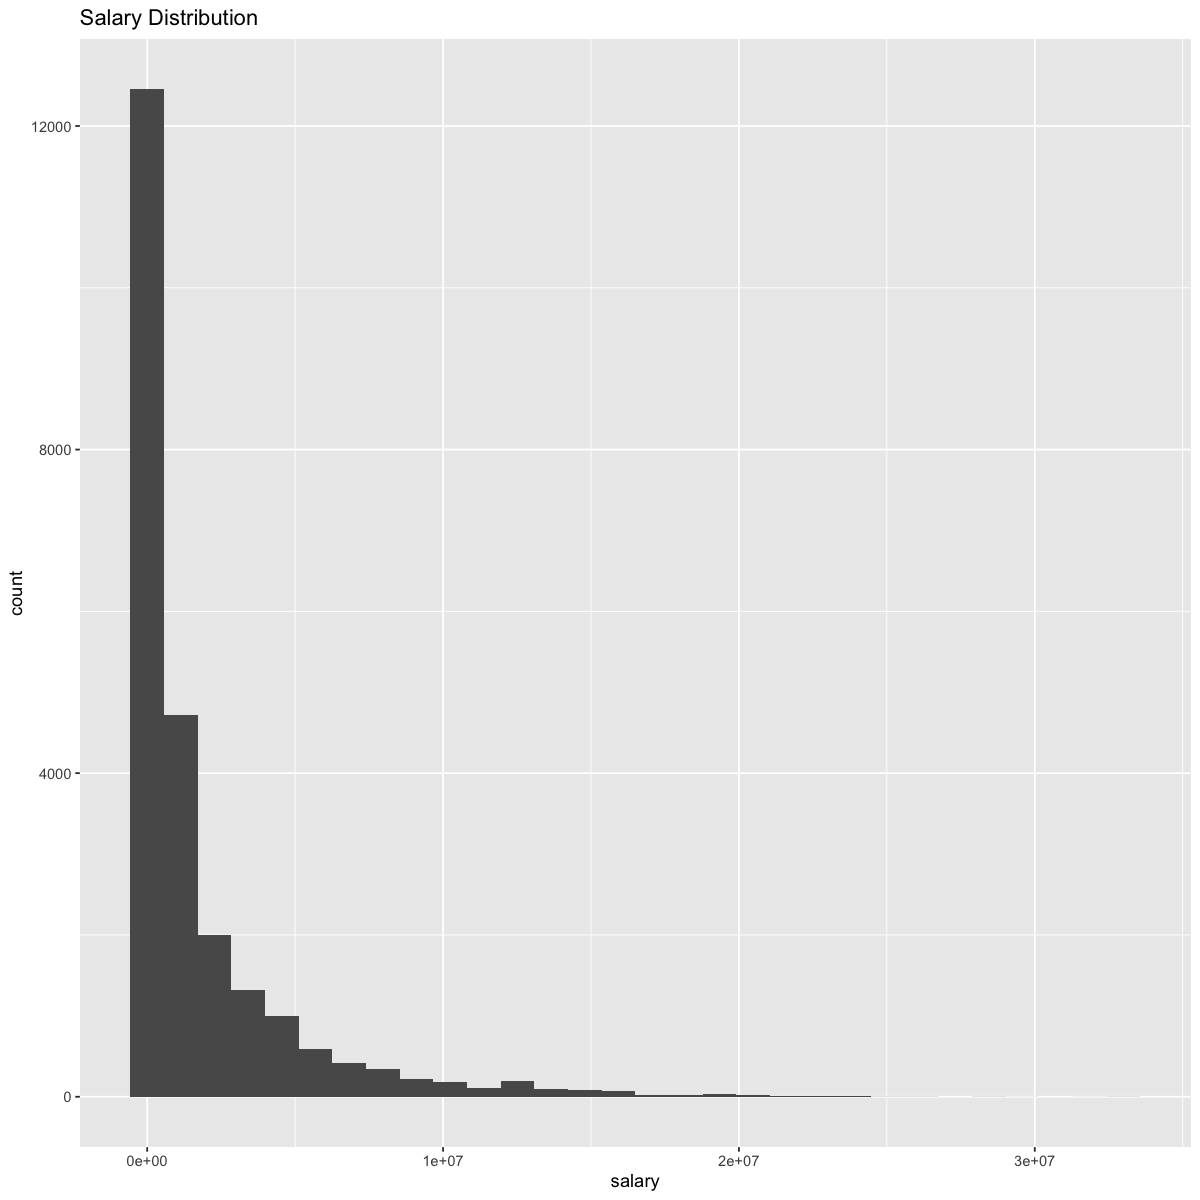

In [17]:
salHistPlot <- ggplot(sal, aes(x=salary)) + geom_histogram() + ggtitle('Salary Distribution')
print(salHistPlot)

In [18]:
batting1985 <- subset(batting, subset = yearID >= 1985)
summary(batting1985)

   playerID             yearID         stint         teamID         
 Length:35652       Min.   :1985   Min.   :1.00   Length:35652      
 Class :character   1st Qu.:1993   1st Qu.:1.00   Class :character  
 Mode  :character   Median :2000   Median :1.00   Mode  :character  
                    Mean   :2000   Mean   :1.08                     
                    3rd Qu.:2007   3rd Qu.:1.00                     
                    Max.   :2013   Max.   :4.00                     
                                                                    
     lgID                 G           G_batting            AB       
 Length:35652       Min.   :  1.0   Min.   :  0.00   Min.   :  0.0  
 Class :character   1st Qu.: 14.0   1st Qu.:  4.00   1st Qu.:  3.0  
 Mode  :character   Median : 34.0   Median : 27.00   Median : 47.0  
                    Mean   : 51.7   Mean   : 46.28   Mean   :144.7  
                    3rd Qu.: 77.0   3rd Qu.: 77.00   3rd Qu.:241.0  
                    Max.   :163.0 

### Merge batting1985 and sal

In [19]:
combo <- merge(batting1985, sal, by = c('playerID','yearID'))

In [20]:
summary(combo)

   playerID             yearID         stint         teamID.x        
 Length:25397       Min.   :1985   Min.   :1.000   Length:25397      
 Class :character   1st Qu.:1993   1st Qu.:1.000   Class :character  
 Mode  :character   Median :1999   Median :1.000   Mode  :character  
                    Mean   :1999   Mean   :1.098                     
                    3rd Qu.:2006   3rd Qu.:1.000                     
                    Max.   :2013   Max.   :4.000                     
                                                                     
    lgID.x                G            G_batting            AB       
 Length:25397       Min.   :  1.00   Min.   :  0.00   Min.   :  0.0  
 Class :character   1st Qu.: 26.00   1st Qu.:  8.00   1st Qu.:  5.0  
 Mode  :character   Median : 50.00   Median : 42.00   Median : 85.0  
                    Mean   : 64.06   Mean   : 57.58   Mean   :182.4  
                    3rd Qu.:101.00   3rd Qu.:101.00   3rd Qu.:336.0  
                    

### Find Lost OAK Players
#### What were their stats in their last OAK season (2001)?

In [21]:
lost_players <- subset(combo, playerID %in% c('giambja01','damonjo01','saenzol01'))

In [22]:
lost_players

,playerID,yearID,stint,teamID.x,lgID.x,G,G_batting,AB,R,H,⋯,SF,GIDP,G_old,BA,OBP,X1B,SLG,teamID.y,lgID.y,salary
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>
5135,damonjo01,1995,1,KCA,AL,47,47,188,32,53,⋯,3,2,47,0.2819149,0.3235294,34,0.4414894,KCA,AL,109000
5136,damonjo01,1996,1,KCA,AL,145,145,517,61,140,⋯,5,4,145,0.2707930,0.3129496,107,0.3675048,KCA,AL,180000
5137,damonjo01,1997,1,KCA,AL,146,146,472,70,130,⋯,1,3,146,0.2754237,0.3378378,102,0.3855932,KCA,AL,240000
5138,damonjo01,1998,1,KCA,AL,161,161,642,104,178,⋯,3,4,161,0.2772586,0.3394625,120,0.4392523,KCA,AL,460000
5139,damonjo01,1999,1,KCA,AL,145,145,583,101,179,⋯,4,13,145,0.3070326,0.3789954,117,0.4768439,KCA,AL,2100000
5140,damonjo01,2000,1,KCA,AL,159,159,655,136,214,⋯,12,7,159,0.3267176,0.3819918,146,0.4946565,KCA,AL,4000000
5141,damonjo01,2001,1,OAK,AL,155,155,644,108,165,⋯,4,7,155,0.2562112,0.3235294,118,0.3633540,OAK,AL,7100000
5142,damonjo01,2002,1,BOS,AL,154,154,623,118,178,⋯,5,4,154,0.2857143,0.3562232,119,0.4430177,BOS,AL,7250000
5143,damonjo01,2003,1,BOS,AL,145,145,608,103,166,⋯,6,5,145,0.2730263,0.3450292,116,0.4046053,BOS,AL,7500000


In [23]:
lost_players <- subset(lost_players, yearID == 2001)
lost_players <- lost_players[c('playerID','H','X2B','X3B','HR','OBP','SLG','BA','AB','salary')]
lost_players

,playerID,H,X2B,X3B,HR,OBP,SLG,BA,AB,salary
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
5141,damonjo01,165,34,4,9,0.3235294,0.3633540,0.2562112,644,7100000
7878,giambja01,178,47,2,38,0.4769001,0.6596154,0.3423077,520,4103333
20114,saenzol01,67,21,1,9,0.2911765,0.3836066,0.2196721,305,290000


### Find Replacement Players With Equivalent Stats in 2001
- Combined salary must be under 15 million dollars
- Combined AB must be greater than or equal to lost_players
- Mean OBP must be greater than or equal to lost_players

In [24]:
targetAB = sum(lost_players$AB)
targetOBP = mean(lost_players$OBP)
print((list(targetAB,targetOBP)))

[[1]]
[1] 1469

[[2]]
[1] 0.3638687



In [25]:
combo2001 <- subset(combo, yearID == 2001)

In [26]:
combo2001

,playerID,yearID,stint,teamID.x,lgID.x,G,G_batting,AB,R,H,⋯,SF,GIDP,G_old,BA,OBP,X1B,SLG,teamID.y,lgID.y,salary
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>
17,abbotje01,2001,1,FLO,NL,28,28,42,5,11,⋯,0,1,28,0.26190476,0.32608696,8,0.33333333,FLO,NL,300000
37,abbotku01,2001,1,ATL,NL,6,6,9,0,2,⋯,0,0,6,0.22222222,0.22222222,2,0.22222222,ATL,NL,600000
44,abbotpa01,2001,1,SEA,AL,28,2,4,0,1,⋯,0,0,2,0.25000000,0.25000000,1,0.25000000,SEA,AL,1700000
62,abreubo01,2001,1,PHI,NL,162,162,588,118,170,⋯,9,13,162,0.28911565,0.39346591,87,0.54251701,PHI,NL,4983000
130,adamste01,2001,1,LAN,NL,43,41,39,2,2,⋯,1,0,41,0.05128205,0.11627907,1,0.07692308,LAN,NL,2600000
157,agbaybe01,2001,1,NYN,NL,91,91,296,28,82,⋯,1,11,91,0.27702703,0.36390533,60,0.39864865,NYN,NL,260000
258,alfonan01,2001,1,FLO,NL,58,54,0,0,0,⋯,0,0,54,NaN,NaN,0,NaN,FLO,NL,2450000
271,alfoned01,2001,1,NYN,NL,124,124,457,64,111,⋯,5,7,124,0.24288840,0.32239382,72,0.40262582,NYN,NL,5750000
287,alicelu01,2001,1,KCA,AL,113,113,387,44,106,⋯,1,6,113,0.27390181,0.32048193,82,0.36692506,KCA,AL,800000


Warning message:
“Removed 168 rows containing missing values (geom_point).”


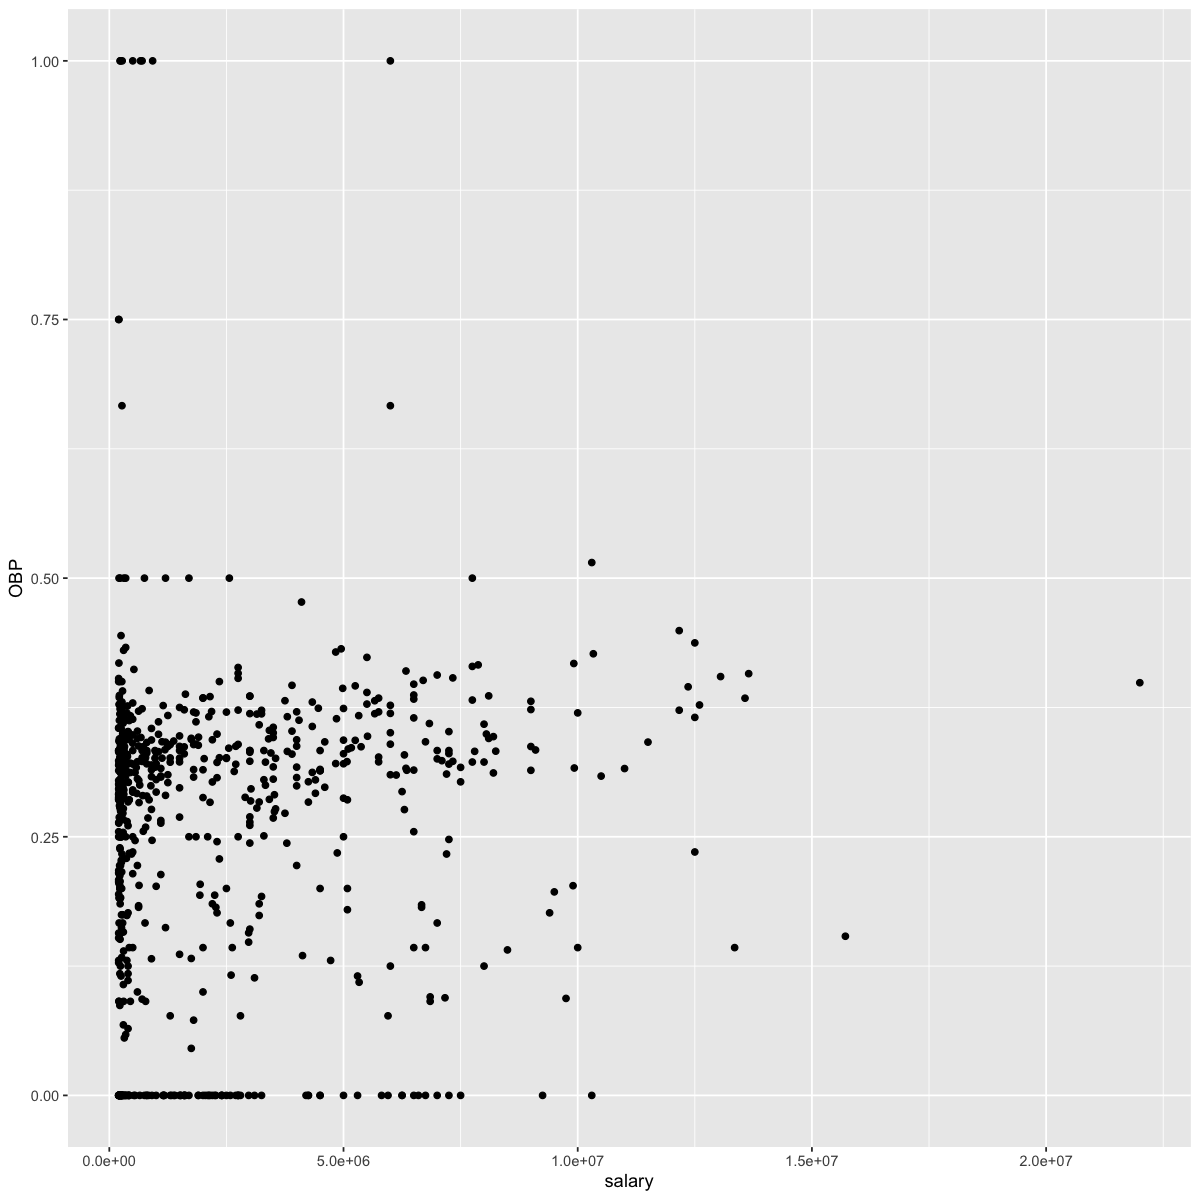

In [27]:
salaryVOBP <- ggplot(combo2001, aes(x=salary, y=OBP)) + geom_point()
print(salaryVOBP)

In [36]:
targetPlayers <- filter(combo2001, salary <= 10000000, OBP > 0, OBP < 0.5, AB > targetAB/3)

## Create Random Groups of Three Satisfying the Conditions

In [37]:
trials <- 0
shortlist <- data.frame()
while (trials < 20){
    random3 <- sample_n(targetPlayers, 3)
    if (mean(random3$OBP) >= targetOBP & sum(random3$salary) <= 1500000){
        random3$group <- trials
        shortlist <- rbind(shortlist, select(random3, playerID, AB, OBP, salary, group))
        trials <- trials + 1
    }
}
shortlist

playerID,AB,OBP,salary,group
<chr>,<int>,<dbl>,<int>,<dbl>
nixontr01,535,0.3763955,390000,0
polanpl01,564,0.3422819,320000,0
mientdo01,543,0.3865815,215000,0
koskico01,562,0.3620955,300000,1
berkmla01,577,0.4302326,305000,1
mientdo01,543,0.3865815,215000,1
berkmla01,577,0.4302326,305000,2
pujolal01,590,0.4029630,200000,2
guzmacr01,493,0.3371869,325000,2


## Which groups have the best statistics?

In [38]:
shortlListAgg <- shortlist %>% group_by(group) %>% summarise(meanOBP = mean(OBP), sumSal = sum(salary))

`summarise()` ungrouping output (override with `.groups` argument)



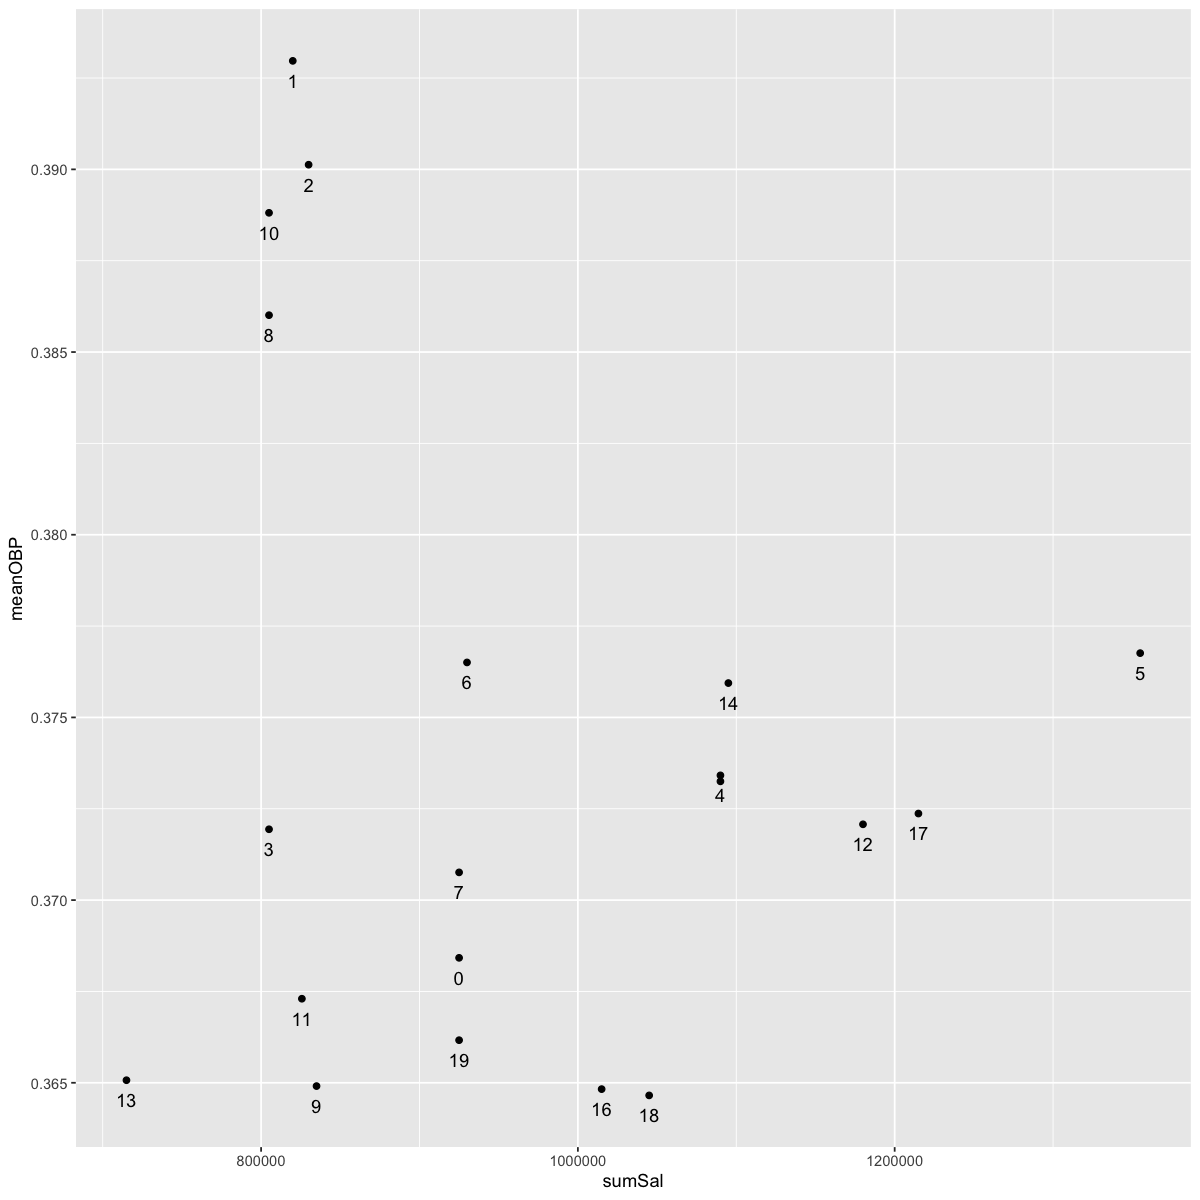

In [39]:
candidateGroups <- ggplot(shortlListAgg, aes(x=sumSal, y=meanOBP)) + geom_point() +
                geom_text(aes(label = group), vjust=2, check_overlap = TRUE)
print(candidateGroups)

### Top left groups provide the most value for their combined salaries

### Group 1
- koskico01
- berkmla01
- mientdo01

In [42]:
filter(shortlist, group == 1)

playerID,AB,OBP,salary,group
<chr>,<int>,<dbl>,<int>,<dbl>
koskico01,562,0.3620955,300000,1
berkmla01,577,0.4302326,305000,1
mientdo01,543,0.3865815,215000,1


## Alternative decision process: just make the salary fit under 15 M dollars

In [48]:
topOBPCandidates <- head(select(arrange(targetPlayers, desc(OBP)), playerID, OBP, salary))
topOBPCandidates

,playerID,OBP,salary
,<chr>,<dbl>,<int>
1,giambja01,0.4769001,4103333
2,heltoto01,0.4316547,4950000
3,berkmla01,0.4302326,305000
4,gonzalu01,0.4285714,4833333
5,sheffga01,0.4174757,9916667
6,thomeji01,0.4161491,7875000


In [52]:
summarise(filter(topOBPCandidates, playerID %in% c('heltoto01','berkmla01','gonzalu01')), sum(salary))

sum(salary)
<int>
10088333


### Under this decision process, the best players are:
- heltoto01
- berkmla01
- gonzalu01